In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop

Text(0.5, 1.0, 'Dataset with two classes')

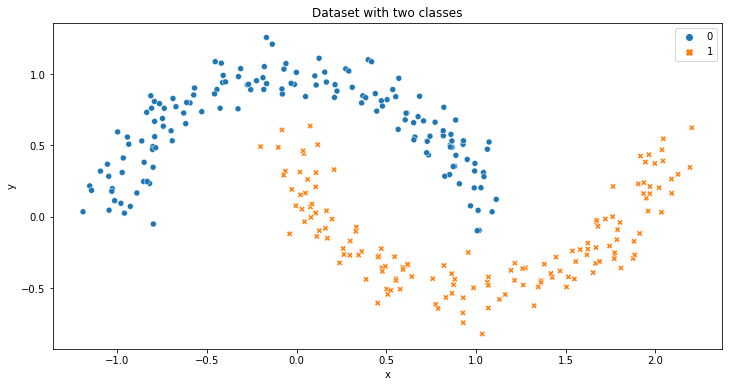

In [2]:
import seaborn as sns
from sklearn.datasets import make_moons

plt.figure(figsize=(12,6))

nr_samples = 300
X, y = make_moons(n_samples=nr_samples, noise=0.1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset with two classes")

In [235]:
?make_moons

In [10]:
def get_model(optimizer):
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(2,)),
        keras.layers.Dense(12, activation="relu"),
        keras.layers.Dense(13, activation="relu"),
        keras.layers.Dense(13, activation="relu"),
        keras.layers.Dense(2, activation="softmax")
    ])
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
    
    return model

In [11]:
def visualize2DSoftmax(X, y, model, title=None):
    plt.figure(figsize=(12,6))
    x_min = np.min(X[:,0])-0.5
    x_max = np.max(X[:,0])+0.5
    y_min = np.min(X[:,1])-0.5
    y_max = np.max(X[:,1])+0.5
    
    xv, yv = np.meshgrid(
        np.linspace(x_min, x_max, num=20),                      
        np.linspace(y_min, y_max, num=20), indexing='ij'
    )
    xy_v = np.hstack((xv.reshape(-1,1), yv.reshape(-1,1)))
    print(xy_v.shape)
    y_pred = np.argmax(model.predict(xy_v), axis=1)
 
    cs = plt.contourf(xv, yv, y_pred.reshape(20,20),
    cmap=plt.cm.RdYlBu)
    
    ax = plt.gca()
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax)
    
    if title is not None:
        ax.set_title(title)
        
    plt.show()
        

In [12]:
def visualize_history(history, optimizer, nr_epochs):
    plt.figure()

    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    epochs = range(1, nr_epochs + 1)

    ax[0].plot(epochs, history.history["loss"], label="train loss")
    ax[0].set_xlabel("Epochs")
    ax[0].legend()
    ax[0].set_title(f"Loss by Epoch for optimizer {optimizer}")

    ax[1].plot(epochs, history.history["accuracy"], label="train accuracy")
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_title(f"Accuracy by Epoch for optimizer {optimizer}")
    plt.show()
    

In [13]:
def train_and_visualize_model(optimizer, batch_size, epochs):
    model = get_model(optimizer)

    history = model.fit(X,y, epochs=epochs, batch_size=batch_size, verbose=1)
    
    visualize2DSoftmax(X, y, model)
    visualize_history(history, optimizer._name, epochs)

## Optimizer -- Different update strategies
[Optimizers](https://keras.io/api/optimizers/)

Epoch 1/5000
1/1 [==============================] - 0s 338ms/step - loss: 0.7270 - accuracy: 0.4600
Epoch 2/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.7262 - accuracy: 0.4600
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7253 - accuracy: 0.4600
Epoch 4/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7245 - accuracy: 0.4600
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7237 - accuracy: 0.4633
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7229 - accuracy: 0.4667
Epoch 7/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7221 - accuracy: 0.4800
Epoch 8/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7213 - accuracy: 0.4833
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7206 - accuracy: 0.4867
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7198 - accuracy: 0.4900
Epoch 11/5000
1/1

1/1 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.8500
Epoch 166/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.8500
Epoch 167/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.8533
Epoch 168/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6535 - accuracy: 0.8500
Epoch 169/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.8500
Epoch 170/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.8467
Epoch 171/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.8467
Epoch 172/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.8467
Epoch 173/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.8467
Epoch 174/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.8467
Epoch 175/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.8367
Epoch 248/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.8367
Epoch 249/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.8367
Epoch 250/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.8367
Epoch 251/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.8367
Epoch 252/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6190 - accuracy: 0.8367
Epoch 253/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.8367
Epoch 254/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.8367
Epoch 255/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.8367
Epoch 256/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.8367
Epoch 257/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.8400
Epoch 411/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.8400
Epoch 412/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.8400
Epoch 413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5148 - accuracy: 0.8400
Epoch 414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5140 - accuracy: 0.8400
Epoch 415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.8400
Epoch 416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.8400
Epoch 417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.8400
Epoch 418/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.8400
Epoch 419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5099 - accuracy: 0.8400
Epoch 420/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8467
Epoch 574/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8467
Epoch 575/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.8467
Epoch 576/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8467
Epoch 577/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8467
Epoch 578/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8467
Epoch 579/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3824 - accuracy: 0.8467
Epoch 580/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3817 - accuracy: 0.8467
Epoch 581/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8467
Epoch 582/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8467
Epoch 583/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8467
Epoch 656/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3400 - accuracy: 0.8467
Epoch 657/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.8467
Epoch 658/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3391 - accuracy: 0.8467
Epoch 659/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8467
Epoch 660/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3382 - accuracy: 0.8467
Epoch 661/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3377 - accuracy: 0.8467
Epoch 662/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8467
Epoch 663/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8467
Epoch 664/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8467
Epoch 665/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.3095 - accuracy: 0.8567
Epoch 738/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8600
Epoch 739/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8600
Epoch 740/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8600
Epoch 741/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.8600
Epoch 742/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8600
Epoch 743/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8600
Epoch 744/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8600
Epoch 745/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8600
Epoch 746/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8600
Epoch 747/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.2877 - accuracy: 0.8767
Epoch 820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.8767
Epoch 821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2872 - accuracy: 0.8767
Epoch 822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2870 - accuracy: 0.8767
Epoch 823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2868 - accuracy: 0.8767
Epoch 824/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.8767
Epoch 825/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8800
Epoch 826/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.8800
Epoch 827/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2859 - accuracy: 0.8800
Epoch 828/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.8800
Epoch 829/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.2709 - accuracy: 0.8800
Epoch 902/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2708 - accuracy: 0.8800
Epoch 903/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2706 - accuracy: 0.8800
Epoch 904/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2704 - accuracy: 0.8800
Epoch 905/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2702 - accuracy: 0.8800
Epoch 906/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2701 - accuracy: 0.8800
Epoch 907/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2699 - accuracy: 0.8800
Epoch 908/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2697 - accuracy: 0.8800
Epoch 909/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.8800
Epoch 910/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2694 - accuracy: 0.8800
Epoch 911/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.8967
Epoch 1064/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2477 - accuracy: 0.8967
Epoch 1065/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.8967
Epoch 1066/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.8967
Epoch 1067/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.8967
Epoch 1068/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2472 - accuracy: 0.8967
Epoch 1069/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2471 - accuracy: 0.8967
Epoch 1070/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2470 - accuracy: 0.8967
Epoch 1071/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.8967
Epoch 1072/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.8967
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.2332 - accuracy: 0.8933
Epoch 1226/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.8933
Epoch 1227/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2330 - accuracy: 0.8933
Epoch 1228/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.8933
Epoch 1229/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2329 - accuracy: 0.8933
Epoch 1230/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.8933
Epoch 1231/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2327 - accuracy: 0.8933
Epoch 1232/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2327 - accuracy: 0.8933
Epoch 1233/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.8933
Epoch 1234/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.8933
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.2238 - accuracy: 0.8967
Epoch 1388/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.8967
Epoch 1389/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2238 - accuracy: 0.8967
Epoch 1390/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2237 - accuracy: 0.8967
Epoch 1391/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2237 - accuracy: 0.8967
Epoch 1392/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2236 - accuracy: 0.8967
Epoch 1393/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2236 - accuracy: 0.8967
Epoch 1394/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.8967
Epoch 1395/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2235 - accuracy: 0.8967
Epoch 1396/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.8967
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.2173 - accuracy: 0.9000
Epoch 1549/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2173 - accuracy: 0.9000
Epoch 1550/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2172 - accuracy: 0.9000
Epoch 1551/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2172 - accuracy: 0.9000
Epoch 1552/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2172 - accuracy: 0.9000
Epoch 1553/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2171 - accuracy: 0.9000
Epoch 1554/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2171 - accuracy: 0.9000
Epoch 1555/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9000
Epoch 1556/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9000
Epoch 1557/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9067
Epoch 1711/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9067
Epoch 1712/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9067
Epoch 1713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2116 - accuracy: 0.9067
Epoch 1714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2116 - accuracy: 0.9067
Epoch 1715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9067
Epoch 1716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9067
Epoch 1717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2115 - accuracy: 0.9067
Epoch 1718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2115 - accuracy: 0.9067
Epoch 1719/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2114 - accuracy: 0.9067
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.2063 - accuracy: 0.9067
Epoch 1873/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9067
Epoch 1874/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2062 - accuracy: 0.9067
Epoch 1875/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 0.9067
Epoch 1876/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9067
Epoch 1877/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9067
Epoch 1878/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2061 - accuracy: 0.9067
Epoch 1879/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9067
Epoch 1880/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.9067
Epoch 1881/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9067
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.2001 - accuracy: 0.9167
Epoch 2034/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2001 - accuracy: 0.9167
Epoch 2035/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9167
Epoch 2036/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9167
Epoch 2037/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000 - accuracy: 0.9167
Epoch 2038/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1999 - accuracy: 0.9167
Epoch 2039/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9167
Epoch 2040/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 0.9167
Epoch 2041/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1998 - accuracy: 0.9167
Epoch 2042/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1997 - accuracy: 0.9167
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.9267
Epoch 2194/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9267
Epoch 2195/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1930 - accuracy: 0.9267
Epoch 2196/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9267
Epoch 2197/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1929 - accuracy: 0.9267
Epoch 2198/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9267
Epoch 2199/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9267
Epoch 2200/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9267
Epoch 2201/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9267
Epoch 2202/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1927 - accuracy: 0.9267
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.1854 - accuracy: 0.9300
Epoch 2355/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1854 - accuracy: 0.9300
Epoch 2356/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1853 - accuracy: 0.9300
Epoch 2357/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1853 - accuracy: 0.9300
Epoch 2358/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1852 - accuracy: 0.9300
Epoch 2359/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1852 - accuracy: 0.9300
Epoch 2360/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1851 - accuracy: 0.9300
Epoch 2361/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9300
Epoch 2362/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1850 - accuracy: 0.9300
Epoch 2363/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1850 - accuracy: 0.9300
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.1769 - accuracy: 0.9333
Epoch 2517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1769 - accuracy: 0.9333
Epoch 2518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.9333
Epoch 2519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.9333
Epoch 2520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1767 - accuracy: 0.9333
Epoch 2521/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9333
Epoch 2522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1766 - accuracy: 0.9333
Epoch 2523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1766 - accuracy: 0.9333
Epoch 2524/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9333
Epoch 2525/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9333
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9367
Epoch 2678/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1681 - accuracy: 0.9367
Epoch 2679/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1681 - accuracy: 0.9367
Epoch 2680/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9367
Epoch 2681/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9367
Epoch 2682/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1679 - accuracy: 0.9367
Epoch 2683/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.9367
Epoch 2684/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1678 - accuracy: 0.9367
Epoch 2685/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9367
Epoch 2686/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9367
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9433
Epoch 2839/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1585 - accuracy: 0.9433
Epoch 2840/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9433
Epoch 2841/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9433
Epoch 2842/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1583 - accuracy: 0.9433
Epoch 2843/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9433
Epoch 2844/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9433
Epoch 2845/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.9433
Epoch 2846/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1580 - accuracy: 0.9433
Epoch 2847/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9433
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.9433
Epoch 3000/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1478 - accuracy: 0.9433
Epoch 3001/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1477 - accuracy: 0.9433
Epoch 3002/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9433
Epoch 3003/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9433
Epoch 3004/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1475 - accuracy: 0.9433
Epoch 3005/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1474 - accuracy: 0.9433
Epoch 3006/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1473 - accuracy: 0.9433
Epoch 3007/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1473 - accuracy: 0.9433
Epoch 3008/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 0.9433
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.1364 - accuracy: 0.9467
Epoch 3162/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1364 - accuracy: 0.9467
Epoch 3163/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1363 - accuracy: 0.9467
Epoch 3164/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1362 - accuracy: 0.9467
Epoch 3165/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9467
Epoch 3166/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9500
Epoch 3167/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1360 - accuracy: 0.9500
Epoch 3168/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1359 - accuracy: 0.9500
Epoch 3169/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1359 - accuracy: 0.9500
Epoch 3170/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1358 - accuracy: 0.9500
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.1246 - accuracy: 0.9500
Epoch 3324/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1245 - accuracy: 0.9500
Epoch 3325/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.9500
Epoch 3326/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.9500
Epoch 3327/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1243 - accuracy: 0.9500
Epoch 3328/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1242 - accuracy: 0.9500
Epoch 3329/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1241 - accuracy: 0.9500
Epoch 3330/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.9500
Epoch 3331/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1240 - accuracy: 0.9500
Epoch 3332/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1239 - accuracy: 0.9500
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.1117 - accuracy: 0.9567
Epoch 3485/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1117 - accuracy: 0.9567
Epoch 3486/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1116 - accuracy: 0.9567
Epoch 3487/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9567
Epoch 3488/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9567
Epoch 3489/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1113 - accuracy: 0.9567
Epoch 3490/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1113 - accuracy: 0.9567
Epoch 3491/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1112 - accuracy: 0.9567
Epoch 3492/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1111 - accuracy: 0.9567
Epoch 3493/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9567
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.9633
Epoch 3646/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9633
Epoch 3647/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9633
Epoch 3648/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0984 - accuracy: 0.9633
Epoch 3649/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0983 - accuracy: 0.9633
Epoch 3650/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0983 - accuracy: 0.9633
Epoch 3651/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 0.9633
Epoch 3652/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.9633
Epoch 3653/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0980 - accuracy: 0.9633
Epoch 3654/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0979 - accuracy: 0.9633
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.0860 - accuracy: 0.9700
Epoch 3807/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9700
Epoch 3808/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0858 - accuracy: 0.9700
Epoch 3809/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0858 - accuracy: 0.9700
Epoch 3810/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0857 - accuracy: 0.9700
Epoch 3811/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0856 - accuracy: 0.9700
Epoch 3812/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.9700
Epoch 3813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.9700
Epoch 3814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0854 - accuracy: 0.9700
Epoch 3815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0853 - accuracy: 0.9700
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9767
Epoch 3969/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0742 - accuracy: 0.9767
Epoch 3970/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9767
Epoch 3971/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9767
Epoch 3972/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9767
Epoch 3973/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9767
Epoch 3974/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9767
Epoch 3975/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9767
Epoch 3976/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9767
Epoch 3977/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9800
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9800
Epoch 4131/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9800
Epoch 4132/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0638 - accuracy: 0.9800
Epoch 4133/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9800
Epoch 4134/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9800
Epoch 4135/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9800
Epoch 4136/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9800
Epoch 4137/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9800
Epoch 4138/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9800
Epoch 4139/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9800
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9867
Epoch 4293/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9867
Epoch 4294/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9867
Epoch 4295/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9867
Epoch 4296/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9867
Epoch 4297/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9867
Epoch 4298/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9867
Epoch 4299/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9867
Epoch 4300/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9867
Epoch 4301/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9867
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9900
Epoch 4454/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9900
Epoch 4455/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.9900
Epoch 4456/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9900
Epoch 4457/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9900
Epoch 4458/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9900
Epoch 4459/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9900
Epoch 4460/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9900
Epoch 4461/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9900
Epoch 4462/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9900
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9900
Epoch 4614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9900
Epoch 4615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9900
Epoch 4616/5000
1/1 [==============================] - ETA: 0s - loss: 0.0409 - accuracy: 0.99 - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9900
Epoch 4617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9900
Epoch 4618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9900
Epoch 4619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9900
Epoch 4620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9900
Epoch 4621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9900
Epoch 4622/5000
1/1 [==============================] - 0s 3ms/ste

1/1 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9900
Epoch 4774/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9900
Epoch 4775/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9900
Epoch 4776/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9900
Epoch 4777/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9900
Epoch 4778/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9900
Epoch 4779/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9900
Epoch 4780/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9900
Epoch 4781/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9900
Epoch 4782/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9900
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9967
Epoch 4936/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9967
Epoch 4937/5000
1/1 [==============================] - 0s 998us/step - loss: 0.0314 - accuracy: 0.9967
Epoch 4938/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9967
Epoch 4939/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9967
Epoch 4940/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9967
Epoch 4941/5000
1/1 [==============================] - 0s 999us/step - loss: 0.0313 - accuracy: 0.9967
Epoch 4942/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9967
Epoch 4943/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9967
Epoch 4944/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.9967
Ep

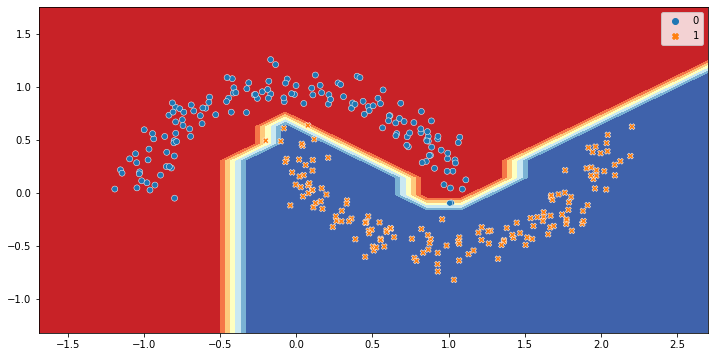

<Figure size 432x288 with 0 Axes>

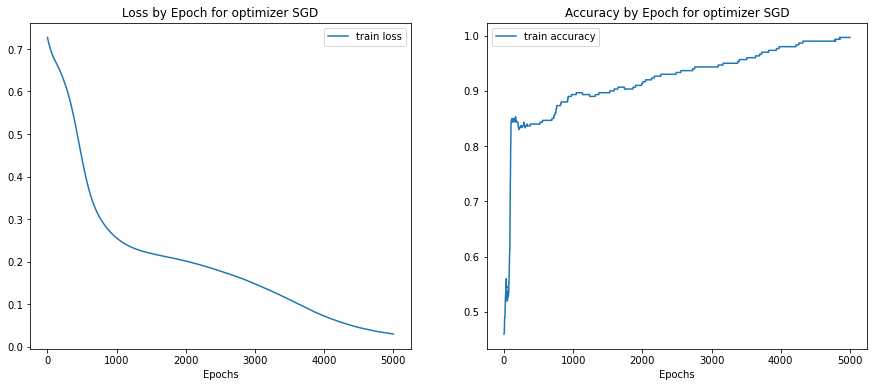

In [14]:
# batch GD
from tensorflow.keras.optimizers import SGD
train_and_visualize_model(optimizer=SGD(learning_rate=0.01), batch_size=nr_samples, epochs=5000)

Epoch 1/400
300/300 [==============================] - 0s 582us/step - loss: 0.4884 - accuracy: 0.8567
Epoch 2/400
300/300 [==============================] - 0s 582us/step - loss: 0.3129 - accuracy: 0.8633
Epoch 3/400
300/300 [==============================] - 0s 572us/step - loss: 0.2627 - accuracy: 0.8967
Epoch 4/400
300/300 [==============================] - 0s 576us/step - loss: 0.2560 - accuracy: 0.8933
Epoch 5/400
300/300 [==============================] - 0s 595us/step - loss: 0.2437 - accuracy: 0.9067
Epoch 6/400
300/300 [==============================] - 0s 579us/step - loss: 0.2255 - accuracy: 0.9100
Epoch 7/400
300/300 [==============================] - 0s 572us/step - loss: 0.2106 - accuracy: 0.9133
Epoch 8/400
300/300 [==============================] - 0s 572us/step - loss: 0.1930 - accuracy: 0.92000s - loss: 0.1931 - accuracy: 0.92
Epoch 9/400
300/300 [==============================] - 0s 582us/step - loss: 0.1782 - accuracy: 0.9367
Epoch 10/400
300/300 [=================

300/300 [==============================] - 0s 579us/step - loss: 9.3756e-04 - accuracy: 1.0000
Epoch 80/400
300/300 [==============================] - 0s 569us/step - loss: 9.6883e-04 - accuracy: 1.0000
Epoch 81/400
300/300 [==============================] - 0s 584us/step - loss: 8.4784e-04 - accuracy: 1.0000
Epoch 82/400
300/300 [==============================] - 0s 589us/step - loss: 9.0225e-04 - accuracy: 1.0000
Epoch 83/400
300/300 [==============================] - 0s 579us/step - loss: 9.1989e-04 - accuracy: 1.00000s - loss: 0.0012 - accuracy: 1.
Epoch 84/400
300/300 [==============================] - 0s 574us/step - loss: 8.6681e-04 - accuracy: 1.0000
Epoch 85/400
300/300 [==============================] - 0s 585us/step - loss: 8.8422e-04 - accuracy: 1.0000
Epoch 86/400
300/300 [==============================] - 0s 582us/step - loss: 8.8600e-04 - accuracy: 1.0000
Epoch 87/400
300/300 [==============================] - 0s 579us/step - loss: 8.0751e-04 - accuracy: 1.0000
Epoch 88/

300/300 [==============================] - 0s 579us/step - loss: 1.9666e-04 - accuracy: 1.0000
Epoch 229/400
300/300 [==============================] - 0s 580us/step - loss: 1.9359e-04 - accuracy: 1.0000
Epoch 230/400
300/300 [==============================] - 0s 579us/step - loss: 1.9112e-04 - accuracy: 1.0000
Epoch 231/400
300/300 [==============================] - 0s 582us/step - loss: 1.9254e-04 - accuracy: 1.0000
Epoch 232/400
300/300 [==============================] - 0s 585us/step - loss: 1.9041e-04 - accuracy: 1.0000
Epoch 233/400
300/300 [==============================] - 0s 585us/step - loss: 1.8900e-04 - accuracy: 1.00000s - loss: 4.3481e-04 - accuracy: 
Epoch 234/400
300/300 [==============================] - 0s 582us/step - loss: 1.8922e-04 - accuracy: 1.0000
Epoch 235/400
300/300 [==============================] - 0s 582us/step - loss: 1.8880e-04 - accuracy: 1.0000
Epoch 236/400
300/300 [==============================] - 0s 582us/step - loss: 1.8706e-04 - accuracy: 1.0000

300/300 [==============================] - 0s 588us/step - loss: 1.3277e-04 - accuracy: 1.0000
Epoch 303/400
300/300 [==============================] - 0s 589us/step - loss: 1.3218e-04 - accuracy: 1.0000
Epoch 304/400
300/300 [==============================] - 0s 589us/step - loss: 1.3299e-04 - accuracy: 1.0000
Epoch 305/400
300/300 [==============================] - 0s 589us/step - loss: 1.3214e-04 - accuracy: 1.0000
Epoch 306/400
300/300 [==============================] - 0s 592us/step - loss: 1.3116e-04 - accuracy: 1.0000
Epoch 307/400
300/300 [==============================] - 0s 595us/step - loss: 1.3097e-04 - accuracy: 1.0000
Epoch 308/400
300/300 [==============================] - 0s 589us/step - loss: 1.2939e-04 - accuracy: 1.0000
Epoch 309/400
300/300 [==============================] - 0s 582us/step - loss: 1.2909e-04 - accuracy: 1.0000
Epoch 310/400
300/300 [==============================] - 0s 581us/step - loss: 1.2937e-04 - accuracy: 1.0000
Epoch 311/400
300/300 [==========

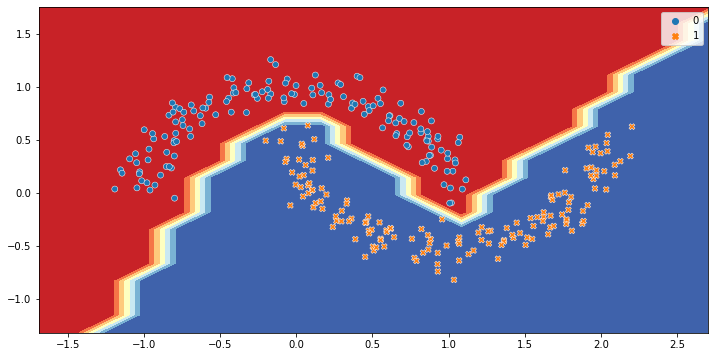

<Figure size 432x288 with 0 Axes>

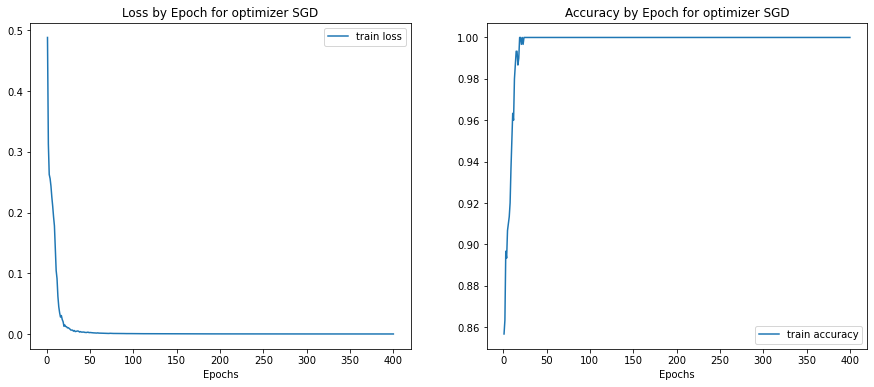

In [15]:
# SGD
train_and_visualize_model(optimizer=SGD(learning_rate=0.01), batch_size=1, epochs=400)

Epoch 1/5000
10/10 [==============================] - 0s 778us/step - loss: 0.6365 - accuracy: 0.4700
Epoch 2/5000
10/10 [==============================] - 0s 778us/step - loss: 0.6224 - accuracy: 0.5367
Epoch 3/5000
10/10 [==============================] - 0s 778us/step - loss: 0.6092 - accuracy: 0.6733
Epoch 4/5000
10/10 [==============================] - 0s 667us/step - loss: 0.5977 - accuracy: 0.7000
Epoch 5/5000
10/10 [==============================] - 0s 667us/step - loss: 0.5874 - accuracy: 0.7067
Epoch 6/5000
10/10 [==============================] - 0s 778us/step - loss: 0.5791 - accuracy: 0.7133
Epoch 7/5000
10/10 [==============================] - 0s 777us/step - loss: 0.5721 - accuracy: 0.7233
Epoch 8/5000
10/10 [==============================] - 0s 778us/step - loss: 0.5652 - accuracy: 0.7333
Epoch 9/5000
10/10 [==============================] - 0s 777us/step - loss: 0.5587 - accuracy: 0.7367
Epoch 10/5000
10/10 [==============================] - 0s 778us/step - loss: 0.553

10/10 [==============================] - 0s 778us/step - loss: 0.2317 - accuracy: 0.9000
Epoch 159/5000
10/10 [==============================] - 0s 778us/step - loss: 0.2312 - accuracy: 0.9033
Epoch 160/5000
10/10 [==============================] - 0s 667us/step - loss: 0.2310 - accuracy: 0.9033
Epoch 161/5000
10/10 [==============================] - 0s 667us/step - loss: 0.2308 - accuracy: 0.9000
Epoch 162/5000
10/10 [==============================] - 0s 667us/step - loss: 0.2296 - accuracy: 0.9000
Epoch 163/5000
10/10 [==============================] - 0s 778us/step - loss: 0.2292 - accuracy: 0.9000
Epoch 164/5000
10/10 [==============================] - 0s 778us/step - loss: 0.2294 - accuracy: 0.9000
Epoch 165/5000
10/10 [==============================] - 0s 889us/step - loss: 0.2275 - accuracy: 0.9033
Epoch 166/5000
10/10 [==============================] - 0s 777us/step - loss: 0.2267 - accuracy: 0.9000
Epoch 167/5000
10/10 [==============================] - 0s 777us/step - loss: 0

10/10 [==============================] - 0s 778us/step - loss: 0.1196 - accuracy: 0.9600
Epoch 315/5000
10/10 [==============================] - 0s 778us/step - loss: 0.1193 - accuracy: 0.9600
Epoch 316/5000
10/10 [==============================] - 0s 778us/step - loss: 0.1184 - accuracy: 0.9600
Epoch 317/5000
10/10 [==============================] - 0s 778us/step - loss: 0.1184 - accuracy: 0.9600
Epoch 318/5000
10/10 [==============================] - 0s 777us/step - loss: 0.1174 - accuracy: 0.9600
Epoch 319/5000
10/10 [==============================] - 0s 778us/step - loss: 0.1180 - accuracy: 0.9600
Epoch 320/5000
10/10 [==============================] - 0s 666us/step - loss: 0.1153 - accuracy: 0.9633
Epoch 321/5000
10/10 [==============================] - 0s 778us/step - loss: 0.1150 - accuracy: 0.9633
Epoch 322/5000
10/10 [==============================] - 0s 778us/step - loss: 0.1134 - accuracy: 0.9667
Epoch 323/5000
10/10 [==============================] - 0s 778us/step - loss: 0

10/10 [==============================] - 0s 778us/step - loss: 0.0303 - accuracy: 0.9933
Epoch 471/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0302 - accuracy: 0.9933
Epoch 472/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0297 - accuracy: 0.9933
Epoch 473/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0299 - accuracy: 0.9933
Epoch 474/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0294 - accuracy: 0.9933
Epoch 475/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0290 - accuracy: 0.9933
Epoch 476/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0289 - accuracy: 0.9933
Epoch 477/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0287 - accuracy: 0.9933
Epoch 478/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0286 - accuracy: 0.9933
Epoch 479/5000
10/10 [==============================] - 0s 778us/step - loss: 0

10/10 [==============================] - 0s 667us/step - loss: 0.0112 - accuracy: 1.0000
Epoch 627/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0112 - accuracy: 1.0000
Epoch 628/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0111 - accuracy: 1.0000
Epoch 629/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0111 - accuracy: 1.0000
Epoch 630/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0111 - accuracy: 1.0000
Epoch 631/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0111 - accuracy: 1.0000
Epoch 632/5000
10/10 [==============================] - 0s 666us/step - loss: 0.0110 - accuracy: 1.0000
Epoch 633/5000
10/10 [==============================] - 0s 777us/step - loss: 0.0110 - accuracy: 1.0000
Epoch 634/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0110 - accuracy: 1.0000
Epoch 635/5000
10/10 [==============================] - 0s 666us/step - loss: 0

10/10 [==============================] - 0s 778us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 705/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 706/5000
10/10 [==============================] - 0s 667us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 707/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 708/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 709/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0082 - accuracy: 1.0000
Epoch 710/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 711/5000
10/10 [==============================] - 0s 667us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 712/5000
10/10 [==============================] - 0s 889us/step - loss: 0.0080 - accuracy: 1.0000
Epoch 713/5000
10/10 [==============================] - 0s 778us/step - loss: 0

10/10 [==============================] - 0s 778us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 861/5000
10/10 [==============================] - 0s 667us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 862/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 863/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 864/5000
10/10 [==============================] - 0s 667us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 865/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 866/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 867/5000
10/10 [==============================] - 0s 666us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 868/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 869/5000
10/10 [==============================] - 0s 778us/step - loss: 0

10/10 [==============================] - 0s 724us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 1017/5000
10/10 [==============================] - 0s 781us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 1018/5000
10/10 [==============================] - 0s 724us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 1019/5000
10/10 [==============================] - 0s 724us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 1020/5000
10/10 [==============================] - 0s 781us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 1021/5000
10/10 [==============================] - 0s 782us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 1022/5000
10/10 [==============================] - 0s 892us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 1023/5000
10/10 [==============================] - 0s 781us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 1024/5000
10/10 [==============================] - 0s 781us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 1025/5000
10/10 [==============================] - 0s 781us/step 

10/10 [==============================] - 0s 778us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1171/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1172/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1173/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1174/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1175/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1176/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1177/5000
10/10 [==============================] - 0s 777us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1178/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1179/5000
10/10 [==============================] - 0s 778us/step 

10/10 [==============================] - 0s 778us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1327/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1328/5000
10/10 [==============================] - 0s 667us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1329/5000
10/10 [==============================] - 0s 777us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1330/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1331/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1332/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1333/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1334/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 1335/5000
10/10 [==============================] - 0s 889us/step 

10/10 [==============================] - 0s 778us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1481/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1482/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1483/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1484/5000
10/10 [==============================] - 0s 666us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1485/5000
10/10 [==============================] - 0s 667us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1486/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1487/5000
10/10 [==============================] - 0s 667us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1488/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 1489/5000
10/10 [==============================] - 0s 667us/step 

10/10 [==============================] - 0s 778us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1636/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1637/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1638/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1639/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1640/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1641/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1642/5000
10/10 [==============================] - 0s 666us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1643/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 1644/5000
10/10 [==============================] - 0s 667us/step 

10/10 [==============================] - 0s 667us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1791/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1792/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1793/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1794/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1795/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1796/5000
10/10 [==============================] - 0s 666us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1797/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 1798/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 1799/5000
10/10 [==============================] - 0s 778us/step 

10/10 [==============================] - 0s 778us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1947/5000
10/10 [==============================] - 0s 777us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1948/5000
10/10 [==============================] - 0s 889us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1949/5000
10/10 [==============================] - 0s 667us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1950/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1951/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1952/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1953/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1954/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 1955/5000
10/10 [==============================] - 0s 778us/step 

10/10 [==============================] - 0s 778us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2103/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2104/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2105/5000
10/10 [==============================] - 0s 667us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2106/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2107/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2108/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2109/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2110/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 2111/5000
10/10 [==============================] - 0s 670us/step 

10/10 [==============================] - 0s 778us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2256/5000
10/10 [==============================] - 0s 889us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2257/5000
10/10 [==============================] - 0s 889us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2258/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2259/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2260/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2261/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2262/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2263/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2264/5000
10/10 [==============================] - 0s 778us/step 

10/10 [==============================] - 0s 667us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2410/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2411/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2412/5000
10/10 [==============================] - 0s 666us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2413/5000
10/10 [==============================] - 0s 777us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2414/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2415/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2416/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2417/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 2418/5000
10/10 [==============================] - 0s 778us/step 

10/10 [==============================] - 0s 778us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 2566/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 2567/5000
10/10 [==============================] - 0s 667us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 2568/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 2569/5000
10/10 [==============================] - 0s 667us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 2570/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 2571/5000
10/10 [==============================] - 0s 666us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 2572/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 2573/5000
10/10 [==============================] - 0s 778us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 2574/5000
10/10 [==============================] - 0s 778us/step 

10/10 [==============================] - 0s 667us/step - loss: 9.3649e-04 - accuracy: 1.0000
Epoch 2716/5000
10/10 [==============================] - 0s 778us/step - loss: 9.3452e-04 - accuracy: 1.0000
Epoch 2717/5000
10/10 [==============================] - 0s 667us/step - loss: 9.3419e-04 - accuracy: 1.0000
Epoch 2718/5000
10/10 [==============================] - 0s 778us/step - loss: 9.3122e-04 - accuracy: 1.0000
Epoch 2719/5000
10/10 [==============================] - 0s 667us/step - loss: 9.2026e-04 - accuracy: 1.0000
Epoch 2720/5000
10/10 [==============================] - 0s 778us/step - loss: 9.2008e-04 - accuracy: 1.0000
Epoch 2721/5000
10/10 [==============================] - 0s 778us/step - loss: 9.1931e-04 - accuracy: 1.0000
Epoch 2722/5000
10/10 [==============================] - 0s 778us/step - loss: 9.2960e-04 - accuracy: 1.0000
Epoch 2723/5000
10/10 [==============================] - 0s 778us/step - loss: 9.2905e-04 - accuracy: 1.0000
Epoch 2724/5000
10/10 [============

10/10 [==============================] - 0s 778us/step - loss: 8.6658e-04 - accuracy: 1.0000
Epoch 2866/5000
10/10 [==============================] - 0s 666us/step - loss: 8.6343e-04 - accuracy: 1.0000
Epoch 2867/5000
10/10 [==============================] - 0s 889us/step - loss: 8.7148e-04 - accuracy: 1.0000
Epoch 2868/5000
10/10 [==============================] - 0s 778us/step - loss: 8.5358e-04 - accuracy: 1.0000
Epoch 2869/5000
10/10 [==============================] - 0s 778us/step - loss: 8.6660e-04 - accuracy: 1.0000
Epoch 2870/5000
10/10 [==============================] - 0s 778us/step - loss: 8.6359e-04 - accuracy: 1.0000
Epoch 2871/5000
10/10 [==============================] - 0s 778us/step - loss: 8.6388e-04 - accuracy: 1.0000
Epoch 2872/5000
10/10 [==============================] - 0s 778us/step - loss: 8.6342e-04 - accuracy: 1.0000
Epoch 2873/5000
10/10 [==============================] - 0s 778us/step - loss: 8.6720e-04 - accuracy: 1.0000
Epoch 2874/5000
10/10 [============

10/10 [==============================] - 0s 667us/step - loss: 7.9676e-04 - accuracy: 1.0000
Epoch 3015/5000
10/10 [==============================] - 0s 778us/step - loss: 8.1326e-04 - accuracy: 1.0000
Epoch 3016/5000
10/10 [==============================] - 0s 778us/step - loss: 8.0848e-04 - accuracy: 1.0000
Epoch 3017/5000
10/10 [==============================] - 0s 778us/step - loss: 7.9641e-04 - accuracy: 1.0000
Epoch 3018/5000
10/10 [==============================] - 0s 889us/step - loss: 7.9664e-04 - accuracy: 1.0000
Epoch 3019/5000
10/10 [==============================] - 0s 778us/step - loss: 8.0599e-04 - accuracy: 1.0000
Epoch 3020/5000
10/10 [==============================] - 0s 778us/step - loss: 8.0844e-04 - accuracy: 1.0000
Epoch 3021/5000
10/10 [==============================] - 0s 778us/step - loss: 8.0547e-04 - accuracy: 1.0000
Epoch 3022/5000
10/10 [==============================] - 0s 778us/step - loss: 8.0615e-04 - accuracy: 1.0000
Epoch 3023/5000
10/10 [============

10/10 [==============================] - 0s 889us/step - loss: 7.5456e-04 - accuracy: 1.0000
Epoch 3164/5000
10/10 [==============================] - 0s 778us/step - loss: 7.5395e-04 - accuracy: 1.0000
Epoch 3165/5000
10/10 [==============================] - 0s 778us/step - loss: 7.4366e-04 - accuracy: 1.0000
Epoch 3166/5000
10/10 [==============================] - 0s 778us/step - loss: 7.5138e-04 - accuracy: 1.0000
Epoch 3167/5000
10/10 [==============================] - 0s 667us/step - loss: 7.5802e-04 - accuracy: 1.0000
Epoch 3168/5000
10/10 [==============================] - 0s 889us/step - loss: 7.4309e-04 - accuracy: 1.0000
Epoch 3169/5000
10/10 [==============================] - 0s 778us/step - loss: 7.5189e-04 - accuracy: 1.0000
Epoch 3170/5000
10/10 [==============================] - 0s 778us/step - loss: 7.5383e-04 - accuracy: 1.0000
Epoch 3171/5000
10/10 [==============================] - 0s 778us/step - loss: 7.5111e-04 - accuracy: 1.0000
Epoch 3172/5000
10/10 [============

10/10 [==============================] - 0s 889us/step - loss: 7.0466e-04 - accuracy: 1.0000
Epoch 3314/5000
10/10 [==============================] - 0s 778us/step - loss: 7.0252e-04 - accuracy: 1.0000
Epoch 3315/5000
10/10 [==============================] - 0s 889us/step - loss: 7.0551e-04 - accuracy: 1.0000
Epoch 3316/5000
10/10 [==============================] - 0s 778us/step - loss: 7.0290e-04 - accuracy: 1.0000
Epoch 3317/5000
10/10 [==============================] - 0s 778us/step - loss: 7.0361e-04 - accuracy: 1.0000
Epoch 3318/5000
10/10 [==============================] - 0s 889us/step - loss: 7.0402e-04 - accuracy: 1.0000
Epoch 3319/5000
10/10 [==============================] - 0s 778us/step - loss: 7.0365e-04 - accuracy: 1.0000
Epoch 3320/5000
10/10 [==============================] - 0s 667us/step - loss: 7.0453e-04 - accuracy: 1.0000
Epoch 3321/5000
10/10 [==============================] - 0s 1ms/step - loss: 6.9607e-04 - accuracy: 1.0000
Epoch 3322/5000
10/10 [==============

Epoch 3388/5000
10/10 [==============================] - 0s 778us/step - loss: 6.8356e-04 - accuracy: 1.0000
Epoch 3389/5000
10/10 [==============================] - 0s 667us/step - loss: 6.8649e-04 - accuracy: 1.0000
Epoch 3390/5000
10/10 [==============================] - 0s 780us/step - loss: 6.8548e-04 - accuracy: 1.0000
Epoch 3391/5000
10/10 [==============================] - 0s 778us/step - loss: 6.7777e-04 - accuracy: 1.0000
Epoch 3392/5000
10/10 [==============================] - 0s 667us/step - loss: 6.8162e-04 - accuracy: 1.0000
Epoch 3393/5000
10/10 [==============================] - 0s 778us/step - loss: 6.7736e-04 - accuracy: 1.0000
Epoch 3394/5000
10/10 [==============================] - 0s 778us/step - loss: 6.8511e-04 - accuracy: 1.0000
Epoch 3395/5000
10/10 [==============================] - 0s 778us/step - loss: 6.8393e-04 - accuracy: 1.0000
Epoch 3396/5000
10/10 [==============================] - 0s 778us/step - loss: 6.8183e-04 - accuracy: 1.0000
Epoch 3397/5000
10/

10/10 [==============================] - 0s 1000us/step - loss: 6.4379e-04 - accuracy: 1.0000
Epoch 3537/5000
10/10 [==============================] - 0s 778us/step - loss: 6.4140e-04 - accuracy: 1.0000
Epoch 3538/5000
10/10 [==============================] - 0s 778us/step - loss: 6.4738e-04 - accuracy: 1.0000
Epoch 3539/5000
10/10 [==============================] - 0s 778us/step - loss: 6.4660e-04 - accuracy: 1.0000
Epoch 3540/5000
10/10 [==============================] - ETA: 0s - loss: 2.7822e-04 - accuracy: 1.00 - 0s 778us/step - loss: 6.4452e-04 - accuracy: 1.0000
Epoch 3541/5000
10/10 [==============================] - 0s 778us/step - loss: 6.5042e-04 - accuracy: 1.0000
Epoch 3542/5000
10/10 [==============================] - 0s 889us/step - loss: 6.4358e-04 - accuracy: 1.0000
Epoch 3543/5000
10/10 [==============================] - 0s 889us/step - loss: 6.4326e-04 - accuracy: 1.0000
Epoch 3544/5000
10/10 [==============================] - 0s 778us/step - loss: 6.3592e-04 - accur

Epoch 3611/5000
10/10 [==============================] - 0s 667us/step - loss: 6.2427e-04 - accuracy: 1.0000
Epoch 3612/5000
10/10 [==============================] - 0s 778us/step - loss: 6.2338e-04 - accuracy: 1.0000
Epoch 3613/5000
10/10 [==============================] - 0s 778us/step - loss: 6.2610e-04 - accuracy: 1.0000
Epoch 3614/5000
10/10 [==============================] - 0s 889us/step - loss: 6.2469e-04 - accuracy: 1.0000
Epoch 3615/5000
10/10 [==============================] - 0s 778us/step - loss: 6.1805e-04 - accuracy: 1.0000
Epoch 3616/5000
10/10 [==============================] - 0s 778us/step - loss: 6.2356e-04 - accuracy: 1.0000
Epoch 3617/5000
10/10 [==============================] - 0s 667us/step - loss: 6.1689e-04 - accuracy: 1.0000
Epoch 3618/5000
10/10 [==============================] - 0s 777us/step - loss: 6.1735e-04 - accuracy: 1.0000
Epoch 3619/5000
10/10 [==============================] - 0s 778us/step - loss: 6.2340e-04 - accuracy: 1.0000
Epoch 3620/5000
10/

10/10 [==============================] - 0s 778us/step - loss: 5.9036e-04 - accuracy: 1.0000
Epoch 3761/5000
10/10 [==============================] - 0s 778us/step - loss: 5.8940e-04 - accuracy: 1.0000
Epoch 3762/5000
10/10 [==============================] - 0s 666us/step - loss: 5.9105e-04 - accuracy: 1.0000
Epoch 3763/5000
10/10 [==============================] - 0s 778us/step - loss: 5.9130e-04 - accuracy: 1.0000
Epoch 3764/5000
10/10 [==============================] - 0s 778us/step - loss: 5.9080e-04 - accuracy: 1.0000
Epoch 3765/5000
10/10 [==============================] - 0s 778us/step - loss: 5.9445e-04 - accuracy: 1.0000
Epoch 3766/5000
10/10 [==============================] - 0s 778us/step - loss: 5.9015e-04 - accuracy: 1.0000
Epoch 3767/5000
10/10 [==============================] - 0s 778us/step - loss: 5.8886e-04 - accuracy: 1.0000
Epoch 3768/5000
10/10 [==============================] - 0s 778us/step - loss: 5.9103e-04 - accuracy: 1.0000
Epoch 3769/5000
10/10 [============

10/10 [==============================] - 0s 1ms/step - loss: 5.5387e-04 - accuracy: 1.0000
Epoch 3910/5000
10/10 [==============================] - 0s 778us/step - loss: 5.6048e-04 - accuracy: 1.0000
Epoch 3911/5000
10/10 [==============================] - 0s 771us/step - loss: 5.5936e-04 - accuracy: 1.0000
Epoch 3912/5000
10/10 [==============================] - 0s 778us/step - loss: 5.5432e-04 - accuracy: 1.0000
Epoch 3913/5000
10/10 [==============================] - 0s 666us/step - loss: 5.5853e-04 - accuracy: 1.0000
Epoch 3914/5000
10/10 [==============================] - 0s 889us/step - loss: 5.5957e-04 - accuracy: 1.0000
Epoch 3915/5000
10/10 [==============================] - 0s 666us/step - loss: 5.6035e-04 - accuracy: 1.0000
Epoch 3916/5000
10/10 [==============================] - 0s 777us/step - loss: 5.5778e-04 - accuracy: 1.0000
Epoch 3917/5000
10/10 [==============================] - 0s 778us/step - loss: 5.5858e-04 - accuracy: 1.0000
Epoch 3918/5000
10/10 [==============

10/10 [==============================] - 0s 667us/step - loss: 5.3482e-04 - accuracy: 1.0000
Epoch 4060/5000
10/10 [==============================] - 0s 778us/step - loss: 5.3087e-04 - accuracy: 1.0000
Epoch 4061/5000
10/10 [==============================] - 0s 789us/step - loss: 5.3531e-04 - accuracy: 1.0000
Epoch 4062/5000
10/10 [==============================] - 0s 667us/step - loss: 5.3072e-04 - accuracy: 1.0000
Epoch 4063/5000
10/10 [==============================] - 0s 778us/step - loss: 5.3091e-04 - accuracy: 1.0000
Epoch 4064/5000
10/10 [==============================] - 0s 666us/step - loss: 5.3343e-04 - accuracy: 1.0000
Epoch 4065/5000
10/10 [==============================] - 0s 889us/step - loss: 5.3069e-04 - accuracy: 1.0000
Epoch 4066/5000
10/10 [==============================] - 0s 666us/step - loss: 5.3034e-04 - accuracy: 1.0000
Epoch 4067/5000
10/10 [==============================] - 0s 778us/step - loss: 5.2849e-04 - accuracy: 1.0000
Epoch 4068/5000
10/10 [============

10/10 [==============================] - 0s 778us/step - loss: 4.9869e-04 - accuracy: 1.0000
Epoch 4209/5000
10/10 [==============================] - 0s 775us/step - loss: 5.0527e-04 - accuracy: 1.0000
Epoch 4210/5000
10/10 [==============================] - 0s 778us/step - loss: 5.0491e-04 - accuracy: 1.0000
Epoch 4211/5000
10/10 [==============================] - 0s 778us/step - loss: 5.0474e-04 - accuracy: 1.0000
Epoch 4212/5000
10/10 [==============================] - 0s 889us/step - loss: 5.0421e-04 - accuracy: 1.0000
Epoch 4213/5000
10/10 [==============================] - 0s 778us/step - loss: 5.0404e-04 - accuracy: 1.0000
Epoch 4214/5000
10/10 [==============================] - 0s 778us/step - loss: 4.9924e-04 - accuracy: 1.0000
Epoch 4215/5000
10/10 [==============================] - 0s 778us/step - loss: 5.0469e-04 - accuracy: 1.0000
Epoch 4216/5000
10/10 [==============================] - 0s 778us/step - loss: 4.9938e-04 - accuracy: 1.0000
Epoch 4217/5000
10/10 [============

10/10 [==============================] - 0s 778us/step - loss: 4.8188e-04 - accuracy: 1.0000
Epoch 4359/5000
10/10 [==============================] - 0s 778us/step - loss: 4.8449e-04 - accuracy: 1.0000
Epoch 4360/5000
10/10 [==============================] - 0s 777us/step - loss: 4.7642e-04 - accuracy: 1.0000
Epoch 4361/5000
10/10 [==============================] - 0s 777us/step - loss: 4.8079e-04 - accuracy: 1.0000
Epoch 4362/5000
10/10 [==============================] - 0s 778us/step - loss: 4.8024e-04 - accuracy: 1.0000
Epoch 4363/5000
10/10 [==============================] - 0s 778us/step - loss: 4.8048e-04 - accuracy: 1.0000
Epoch 4364/5000
10/10 [==============================] - 0s 778us/step - loss: 4.8292e-04 - accuracy: 1.0000
Epoch 4365/5000
10/10 [==============================] - 0s 778us/step - loss: 4.8033e-04 - accuracy: 1.0000
Epoch 4366/5000
10/10 [==============================] - 0s 778us/step - loss: 4.7977e-04 - accuracy: 1.0000
Epoch 4367/5000
10/10 [============

10/10 [==============================] - 0s 778us/step - loss: 4.5908e-04 - accuracy: 1.0000
Epoch 4507/5000
10/10 [==============================] - 0s 778us/step - loss: 4.6137e-04 - accuracy: 1.0000
Epoch 4508/5000
10/10 [==============================] - 0s 778us/step - loss: 4.6153e-04 - accuracy: 1.0000
Epoch 4509/5000
10/10 [==============================] - 0s 778us/step - loss: 4.6507e-04 - accuracy: 1.0000
Epoch 4510/5000
10/10 [==============================] - 0s 778us/step - loss: 4.6371e-04 - accuracy: 1.0000
Epoch 4511/5000
10/10 [==============================] - 0s 778us/step - loss: 4.6149e-04 - accuracy: 1.0000
Epoch 4512/5000
10/10 [==============================] - 0s 778us/step - loss: 4.6365e-04 - accuracy: 1.0000
Epoch 4513/5000
10/10 [==============================] - 0s 778us/step - loss: 4.6050e-04 - accuracy: 1.0000
Epoch 4514/5000
10/10 [==============================] - 0s 778us/step - loss: 4.6371e-04 - accuracy: 1.0000
Epoch 4515/5000
10/10 [============

10/10 [==============================] - 0s 778us/step - loss: 4.3920e-04 - accuracy: 1.0000
Epoch 4656/5000
10/10 [==============================] - 0s 667us/step - loss: 4.3853e-04 - accuracy: 1.0000
Epoch 4657/5000
10/10 [==============================] - 0s 778us/step - loss: 4.3909e-04 - accuracy: 1.0000
Epoch 4658/5000
10/10 [==============================] - 0s 778us/step - loss: 4.3866e-04 - accuracy: 1.0000
Epoch 4659/5000
10/10 [==============================] - 0s 778us/step - loss: 4.3813e-04 - accuracy: 1.0000
Epoch 4660/5000
10/10 [==============================] - 0s 778us/step - loss: 4.3749e-04 - accuracy: 1.0000
Epoch 4661/5000
10/10 [==============================] - 0s 889us/step - loss: 4.3418e-04 - accuracy: 1.0000
Epoch 4662/5000
10/10 [==============================] - 0s 667us/step - loss: 4.3766e-04 - accuracy: 1.0000
Epoch 4663/5000
10/10 [==============================] - 0s 778us/step - loss: 4.3658e-04 - accuracy: 1.0000
Epoch 4664/5000
10/10 [============

10/10 [==============================] - 0s 778us/step - loss: 4.1948e-04 - accuracy: 1.0000
Epoch 4805/5000
10/10 [==============================] - 0s 778us/step - loss: 4.1997e-04 - accuracy: 1.0000
Epoch 4806/5000
10/10 [==============================] - 0s 778us/step - loss: 4.1976e-04 - accuracy: 1.0000
Epoch 4807/5000
10/10 [==============================] - 0s 667us/step - loss: 4.1962e-04 - accuracy: 1.0000
Epoch 4808/5000
10/10 [==============================] - 0s 778us/step - loss: 4.1913e-04 - accuracy: 1.0000
Epoch 4809/5000
10/10 [==============================] - 0s 778us/step - loss: 4.1587e-04 - accuracy: 1.0000
Epoch 4810/5000
10/10 [==============================] - 0s 778us/step - loss: 4.1957e-04 - accuracy: 1.0000
Epoch 4811/5000
10/10 [==============================] - 0s 778us/step - loss: 4.1526e-04 - accuracy: 1.0000
Epoch 4812/5000
10/10 [==============================] - 0s 778us/step - loss: 4.1843e-04 - accuracy: 1.0000
Epoch 4813/5000
10/10 [============

10/10 [==============================] - 0s 778us/step - loss: 4.0320e-04 - accuracy: 1.0000
Epoch 4955/5000
10/10 [==============================] - 0s 778us/step - loss: 4.0232e-04 - accuracy: 1.0000
Epoch 4956/5000
10/10 [==============================] - 0s 778us/step - loss: 4.0215e-04 - accuracy: 1.0000
Epoch 4957/5000
10/10 [==============================] - 0s 778us/step - loss: 4.0341e-04 - accuracy: 1.0000
Epoch 4958/5000
10/10 [==============================] - 0s 778us/step - loss: 4.0213e-04 - accuracy: 1.0000
Epoch 4959/5000
10/10 [==============================] - 0s 889us/step - loss: 4.0135e-04 - accuracy: 1.0000
Epoch 4960/5000
10/10 [==============================] - 0s 667us/step - loss: 4.0109e-04 - accuracy: 1.0000
Epoch 4961/5000
10/10 [==============================] - 0s 777us/step - loss: 4.0409e-04 - accuracy: 1.0000
Epoch 4962/5000
10/10 [==============================] - 0s 778us/step - loss: 4.0311e-04 - accuracy: 1.0000
Epoch 4963/5000
10/10 [============

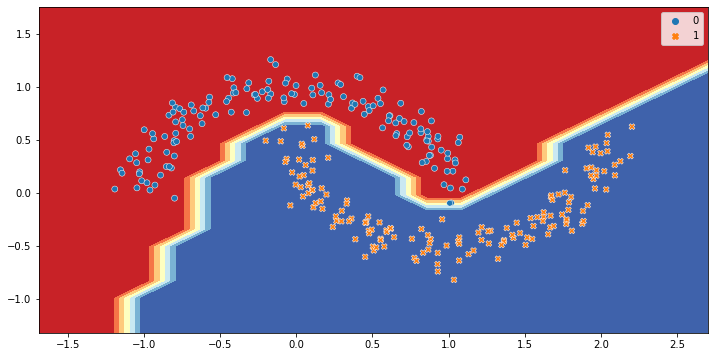

<Figure size 432x288 with 0 Axes>

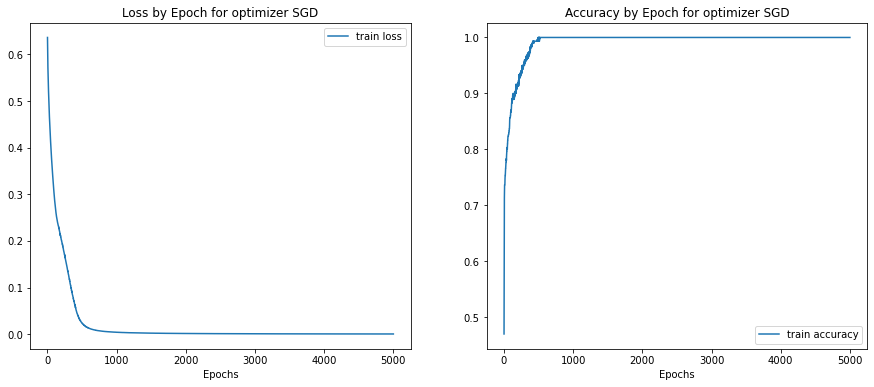

In [17]:
# mini-batch GD
train_and_visualize_model(optimizer=SGD(learning_rate=0.01), batch_size=32, epochs=5000)

Epoch 1/400
10/10 [==============================] - 0s 778us/step - loss: 0.6981 - accuracy: 0.4933
Epoch 2/400
10/10 [==============================] - 0s 778us/step - loss: 0.6771 - accuracy: 0.7767
Epoch 3/400
10/10 [==============================] - 0s 667us/step - loss: 0.6591 - accuracy: 0.8700
Epoch 4/400
10/10 [==============================] - 0s 778us/step - loss: 0.6350 - accuracy: 0.8667
Epoch 5/400
10/10 [==============================] - 0s 778us/step - loss: 0.6024 - accuracy: 0.8600
Epoch 6/400
10/10 [==============================] - 0s 778us/step - loss: 0.5546 - accuracy: 0.8467
Epoch 7/400
10/10 [==============================] - 0s 778us/step - loss: 0.4894 - accuracy: 0.8433
Epoch 8/400
10/10 [==============================] - 0s 778us/step - loss: 0.4100 - accuracy: 0.8533
Epoch 9/400
10/10 [==============================] - 0s 778us/step - loss: 0.3402 - accuracy: 0.8700
Epoch 10/400
10/10 [==============================] - 0s 778us/step - loss: 0.2936 - accura

10/10 [==============================] - 0s 889us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 161/400
10/10 [==============================] - 0s 667us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 162/400
10/10 [==============================] - 0s 778us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 163/400
10/10 [==============================] - 0s 778us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 164/400
10/10 [==============================] - 0s 667us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 165/400
10/10 [==============================] - 0s 778us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 166/400
10/10 [==============================] - 0s 778us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 167/400
10/10 [==============================] - 0s 778us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 168/400
10/10 [==============================] - 0s 778us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 169/400
10/10 [==============================] - 0s 778us/step - loss: 0.0017 - a

10/10 [==============================] - 0s 666us/step - loss: 7.0026e-04 - accuracy: 1.0000
Epoch 316/400
10/10 [==============================] - 0s 778us/step - loss: 7.1553e-04 - accuracy: 1.0000
Epoch 317/400
10/10 [==============================] - 0s 778us/step - loss: 6.5779e-04 - accuracy: 1.0000
Epoch 318/400
10/10 [==============================] - 0s 778us/step - loss: 7.1303e-04 - accuracy: 1.0000
Epoch 319/400
10/10 [==============================] - 0s 889us/step - loss: 6.2314e-04 - accuracy: 1.0000
Epoch 320/400
10/10 [==============================] - 0s 778us/step - loss: 7.2594e-04 - accuracy: 1.0000
Epoch 321/400
10/10 [==============================] - 0s 778us/step - loss: 6.8296e-04 - accuracy: 1.0000
Epoch 322/400
10/10 [==============================] - 0s 778us/step - loss: 6.4495e-04 - accuracy: 1.0000
Epoch 323/400
10/10 [==============================] - 0s 778us/step - loss: 6.5339e-04 - accuracy: 1.0000
Epoch 324/400
10/10 [==============================

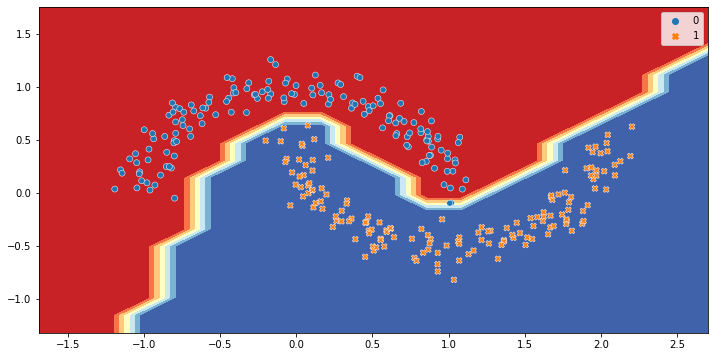

<Figure size 432x288 with 0 Axes>

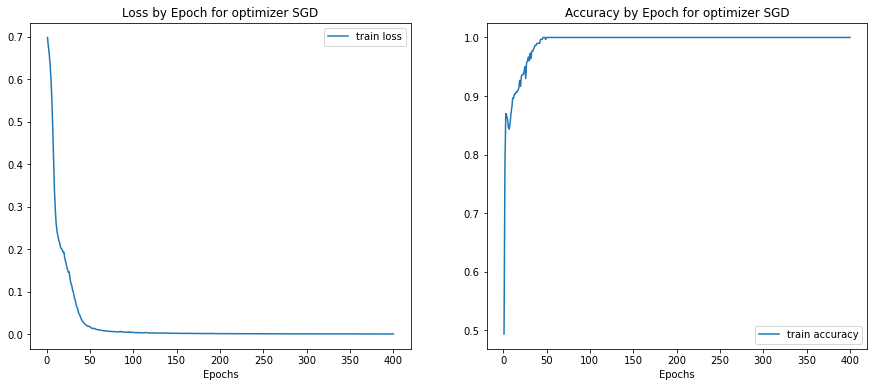

In [18]:
# mini-batch GD with momentum
train_and_visualize_model(optimizer=SGD(learning_rate=0.01, momentum=0.9), batch_size=32, epochs=400)

Epoch 1/400
10/10 [==============================] - 0s 889us/step - loss: 0.6673 - accuracy: 0.8300
Epoch 2/400
10/10 [==============================] - 0s 889us/step - loss: 0.6322 - accuracy: 0.8467
Epoch 3/400
10/10 [==============================] - 0s 778us/step - loss: 0.5844 - accuracy: 0.8500
Epoch 4/400
10/10 [==============================] - 0s 778us/step - loss: 0.5239 - accuracy: 0.8367
Epoch 5/400
10/10 [==============================] - 0s 667us/step - loss: 0.4537 - accuracy: 0.8333
Epoch 6/400
10/10 [==============================] - 0s 778us/step - loss: 0.3867 - accuracy: 0.8500
Epoch 7/400
10/10 [==============================] - 0s 778us/step - loss: 0.3329 - accuracy: 0.8767
Epoch 8/400
10/10 [==============================] - 0s 667us/step - loss: 0.2950 - accuracy: 0.8867
Epoch 9/400
10/10 [==============================] - 0s 778us/step - loss: 0.2717 - accuracy: 0.8933
Epoch 10/400
10/10 [==============================] - 0s 778us/step - loss: 0.2548 - accura

10/10 [==============================] - 0s 889us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 82/400
10/10 [==============================] - 0s 889us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 83/400
10/10 [==============================] - 0s 889us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 84/400
10/10 [==============================] - 0s 778us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 85/400
10/10 [==============================] - 0s 889us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 86/400
10/10 [==============================] - 0s 778us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 87/400
10/10 [==============================] - 0s 889us/step - loss: 0.0043 - accuracy: 1.0000
Epoch 88/400
10/10 [==============================] - 0s 667us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 89/400
10/10 [==============================] - 0s 778us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 90/400
10/10 [==============================] - 0s 778us/step - loss: 0.0040 - accuracy: 

10/10 [==============================] - 0s 778us/step - loss: 9.3255e-04 - accuracy: 1.0000
Epoch 240/400
10/10 [==============================] - 0s 778us/step - loss: 8.9210e-04 - accuracy: 1.0000
Epoch 241/400
10/10 [==============================] - 0s 778us/step - loss: 9.4381e-04 - accuracy: 1.0000
Epoch 242/400
10/10 [==============================] - 0s 778us/step - loss: 9.1790e-04 - accuracy: 1.0000
Epoch 243/400
10/10 [==============================] - 0s 778us/step - loss: 9.0615e-04 - accuracy: 1.0000
Epoch 244/400
10/10 [==============================] - 0s 778us/step - loss: 8.8221e-04 - accuracy: 1.0000
Epoch 245/400
10/10 [==============================] - 0s 778us/step - loss: 9.1802e-04 - accuracy: 1.0000
Epoch 246/400
10/10 [==============================] - 0s 667us/step - loss: 8.9129e-04 - accuracy: 1.0000
Epoch 247/400
10/10 [==============================] - 0s 778us/step - loss: 8.7394e-04 - accuracy: 1.0000
Epoch 248/400
10/10 [==============================

10/10 [==============================] - 0s 778us/step - loss: 4.8038e-04 - accuracy: 1.0000
Epoch 392/400
10/10 [==============================] - 0s 778us/step - loss: 4.6884e-04 - accuracy: 1.0000
Epoch 393/400
10/10 [==============================] - 0s 778us/step - loss: 4.8062e-04 - accuracy: 1.0000
Epoch 394/400
10/10 [==============================] - 0s 778us/step - loss: 4.4834e-04 - accuracy: 1.0000
Epoch 395/400
10/10 [==============================] - 0s 778us/step - loss: 4.6745e-04 - accuracy: 1.0000
Epoch 396/400
10/10 [==============================] - 0s 778us/step - loss: 4.7114e-04 - accuracy: 1.0000
Epoch 397/400
10/10 [==============================] - 0s 778us/step - loss: 4.5700e-04 - accuracy: 1.0000
Epoch 398/400
10/10 [==============================] - 0s 778us/step - loss: 4.5713e-04 - accuracy: 1.0000
Epoch 399/400
10/10 [==============================] - 0s 667us/step - loss: 4.5268e-04 - accuracy: 1.0000
Epoch 400/400
10/10 [==============================

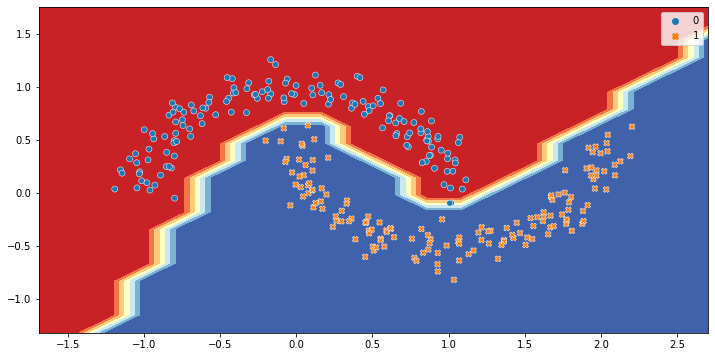

<Figure size 432x288 with 0 Axes>

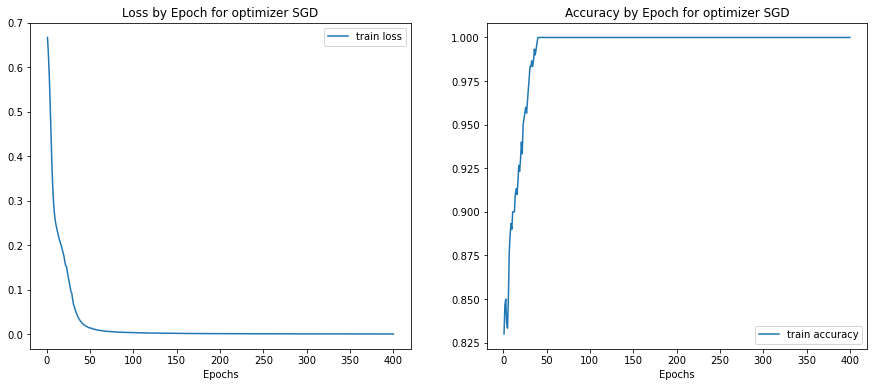

In [19]:
# mini-batch GD with momentum from the last and next step (Nesterov)
train_and_visualize_model(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True), batch_size=32, epochs=400)

In [20]:
# mini-batch GD with adaptive GD -- Adagrad, keep all gradients
from tensorflow.keras.optimizers import Adagrad

?Adagrad

Epoch 1/400
10/10 [==============================] - 1s 778us/step - loss: 0.6406 - accuracy: 0.6633
Epoch 2/400
10/10 [==============================] - 0s 778us/step - loss: 0.5863 - accuracy: 0.8333
Epoch 3/400
10/10 [==============================] - 0s 777us/step - loss: 0.5489 - accuracy: 0.8600
Epoch 4/400
10/10 [==============================] - 0s 778us/step - loss: 0.5138 - accuracy: 0.8700
Epoch 5/400
10/10 [==============================] - 0s 889us/step - loss: 0.4795 - accuracy: 0.8733
Epoch 6/400
10/10 [==============================] - 0s 667us/step - loss: 0.4488 - accuracy: 0.8700
Epoch 7/400
10/10 [==============================] - 0s 777us/step - loss: 0.4224 - accuracy: 0.8733
Epoch 8/400
10/10 [==============================] - 0s 777us/step - loss: 0.3988 - accuracy: 0.8700
Epoch 9/400
10/10 [==============================] - 0s 778us/step - loss: 0.3795 - accuracy: 0.8733
Epoch 10/400
10/10 [==============================] - 0s 778us/step - loss: 0.3620 - accura

10/10 [==============================] - 0s 777us/step - loss: 0.0580 - accuracy: 0.9800
Epoch 161/400
10/10 [==============================] - 0s 778us/step - loss: 0.0575 - accuracy: 0.9800
Epoch 162/400
10/10 [==============================] - 0s 778us/step - loss: 0.0571 - accuracy: 0.9833
Epoch 163/400
10/10 [==============================] - 0s 778us/step - loss: 0.0566 - accuracy: 0.9800
Epoch 164/400
10/10 [==============================] - 0s 666us/step - loss: 0.0562 - accuracy: 0.9833
Epoch 165/400
10/10 [==============================] - 0s 777us/step - loss: 0.0557 - accuracy: 0.9833
Epoch 166/400
10/10 [==============================] - 0s 778us/step - loss: 0.0552 - accuracy: 0.9800
Epoch 167/400
10/10 [==============================] - 0s 667us/step - loss: 0.0549 - accuracy: 0.9867
Epoch 168/400
10/10 [==============================] - 0s 778us/step - loss: 0.0544 - accuracy: 0.9833
Epoch 169/400
10/10 [==============================] - 0s 777us/step - loss: 0.0539 - a

10/10 [==============================] - 0s 778us/step - loss: 0.0191 - accuracy: 1.0000
Epoch 319/400
10/10 [==============================] - 0s 777us/step - loss: 0.0190 - accuracy: 1.0000
Epoch 320/400
10/10 [==============================] - 0s 778us/step - loss: 0.0189 - accuracy: 1.0000
Epoch 321/400
10/10 [==============================] - 0s 778us/step - loss: 0.0188 - accuracy: 1.0000
Epoch 322/400
10/10 [==============================] - 0s 778us/step - loss: 0.0187 - accuracy: 1.0000
Epoch 323/400
10/10 [==============================] - 0s 777us/step - loss: 0.0185 - accuracy: 1.0000
Epoch 324/400
10/10 [==============================] - 0s 778us/step - loss: 0.0185 - accuracy: 1.0000
Epoch 325/400
10/10 [==============================] - 0s 666us/step - loss: 0.0184 - accuracy: 1.0000
Epoch 326/400
10/10 [==============================] - 0s 778us/step - loss: 0.0183 - accuracy: 1.0000
Epoch 327/400
10/10 [==============================] - 0s 778us/step - loss: 0.0181 - a

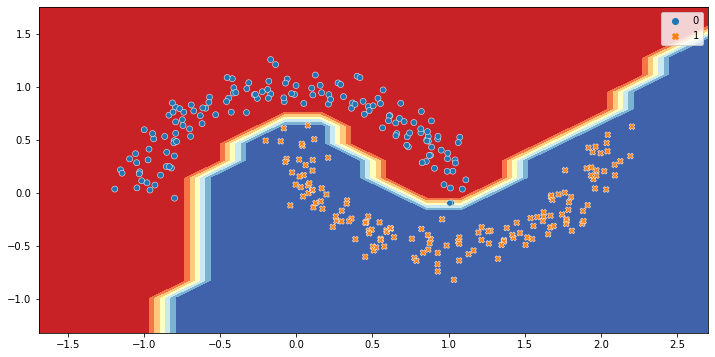

<Figure size 432x288 with 0 Axes>

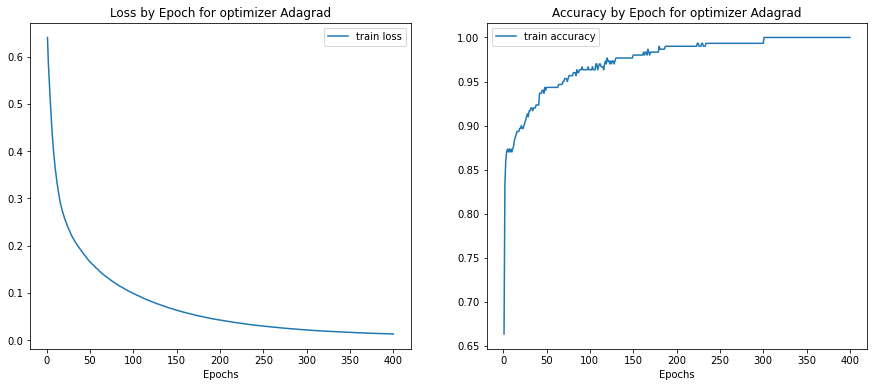

In [21]:
train_and_visualize_model(optimizer=Adagrad(learning_rate=0.01), batch_size=32, epochs=400)

In [22]:
# mini-batch GD with adaptive GD -- Adadelta, keep only a recent list of gradients
from tensorflow.keras.optimizers import Adadelta

?Adadelta

Epoch 1/400
10/10 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.6367
Epoch 2/400
10/10 [==============================] - 0s 778us/step - loss: 0.6349 - accuracy: 0.6567
Epoch 3/400
10/10 [==============================] - 0s 778us/step - loss: 0.6156 - accuracy: 0.6733
Epoch 4/400
10/10 [==============================] - 0s 777us/step - loss: 0.5982 - accuracy: 0.7167
Epoch 5/400
10/10 [==============================] - 0s 778us/step - loss: 0.5816 - accuracy: 0.7333
Epoch 6/400
10/10 [==============================] - 0s 778us/step - loss: 0.5655 - accuracy: 0.7533
Epoch 7/400
10/10 [==============================] - 0s 777us/step - loss: 0.5497 - accuracy: 0.7700
Epoch 8/400
10/10 [==============================] - 0s 778us/step - loss: 0.5345 - accuracy: 0.7867
Epoch 9/400
10/10 [==============================] - 0s 778us/step - loss: 0.5196 - accuracy: 0.7933
Epoch 10/400
10/10 [==============================] - 0s 778us/step - loss: 0.5062 - accuracy

10/10 [==============================] - 0s 889us/step - loss: 0.2444 - accuracy: 0.9033
Epoch 82/400
10/10 [==============================] - 0s 889us/step - loss: 0.2438 - accuracy: 0.9000
Epoch 83/400
10/10 [==============================] - 0s 1ms/step - loss: 0.2437 - accuracy: 0.9033
Epoch 84/400
10/10 [==============================] - 0s 666us/step - loss: 0.2434 - accuracy: 0.9033
Epoch 85/400
10/10 [==============================] - 0s 1000us/step - loss: 0.2412 - accuracy: 0.9000
Epoch 86/400
10/10 [==============================] - 0s 778us/step - loss: 0.2416 - accuracy: 0.9000
Epoch 87/400
10/10 [==============================] - 0s 777us/step - loss: 0.2408 - accuracy: 0.9033
Epoch 88/400
10/10 [==============================] - 0s 889us/step - loss: 0.2398 - accuracy: 0.9000
Epoch 89/400
10/10 [==============================] - 0s 889us/step - loss: 0.2390 - accuracy: 0.9000
Epoch 90/400
10/10 [==============================] - 0s 889us/step - loss: 0.2385 - accuracy: 0

10/10 [==============================] - 0s 889us/step - loss: 0.1898 - accuracy: 0.9267
Epoch 240/400
10/10 [==============================] - 0s 778us/step - loss: 0.1904 - accuracy: 0.9267
Epoch 241/400
10/10 [==============================] - 0s 778us/step - loss: 0.1913 - accuracy: 0.9267
Epoch 242/400
10/10 [==============================] - 0s 889us/step - loss: 0.1935 - accuracy: 0.9133
Epoch 243/400
10/10 [==============================] - 0s 777us/step - loss: 0.1880 - accuracy: 0.9333
Epoch 244/400
10/10 [==============================] - 0s 889us/step - loss: 0.1878 - accuracy: 0.9233
Epoch 245/400
10/10 [==============================] - 0s 778us/step - loss: 0.1876 - accuracy: 0.9300
Epoch 246/400
10/10 [==============================] - 0s 1ms/step - loss: 0.1868 - accuracy: 0.9267
Epoch 247/400
10/10 [==============================] - 0s 889us/step - loss: 0.1856 - accuracy: 0.9300
Epoch 248/400
10/10 [==============================] - 0s 778us/step - loss: 0.1878 - acc

10/10 [==============================] - 0s 778us/step - loss: 0.0617 - accuracy: 0.9800
Epoch 398/400
10/10 [==============================] - 0s 889us/step - loss: 0.0612 - accuracy: 0.9800
Epoch 399/400
10/10 [==============================] - 0s 889us/step - loss: 0.0611 - accuracy: 0.9833
Epoch 400/400
10/10 [==============================] - 0s 667us/step - loss: 0.0613 - accuracy: 0.9800
(400, 2)


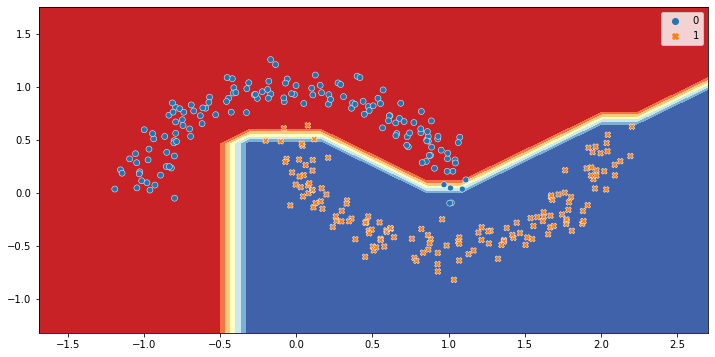

<Figure size 432x288 with 0 Axes>

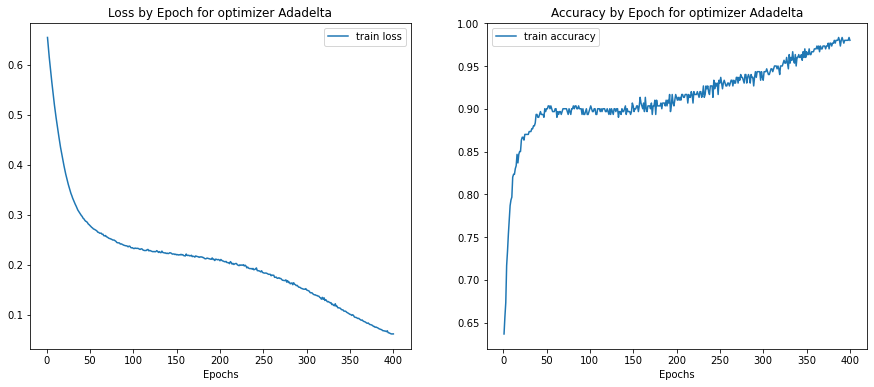

In [27]:
train_and_visualize_model(optimizer=Adadelta(learning_rate=0.01, rho=1), batch_size=32, epochs=400)

In [28]:
# mini-batch GD with adaptive GD -- RMSprop, keep only a recent list of gradients 
from tensorflow.keras.optimizers import RMSprop

?RMSprop

Epoch 1/400
10/10 [==============================] - 0s 778us/step - loss: 0.3922 - accuracy: 0.8300
Epoch 2/400
10/10 [==============================] - 0s 778us/step - loss: 0.2313 - accuracy: 0.8967
Epoch 3/400
10/10 [==============================] - 0s 778us/step - loss: 0.1968 - accuracy: 0.9200
Epoch 4/400
10/10 [==============================] - 0s 778us/step - loss: 0.1853 - accuracy: 0.9333
Epoch 5/400
10/10 [==============================] - 0s 778us/step - loss: 0.1387 - accuracy: 0.9500
Epoch 6/400
10/10 [==============================] - 0s 778us/step - loss: 0.0925 - accuracy: 0.9733
Epoch 7/400
10/10 [==============================] - 0s 889us/step - loss: 0.0742 - accuracy: 0.9767
Epoch 8/400
10/10 [==============================] - 0s 778us/step - loss: 0.0531 - accuracy: 0.9933
Epoch 9/400
10/10 [==============================] - 0s 778us/step - loss: 0.0374 - accuracy: 0.9933
Epoch 10/400
10/10 [==============================] - 0s 778us/step - loss: 0.0368 - accura

10/10 [==============================] - 0s 778us/step - loss: 1.8015e-06 - accuracy: 1.0000
Epoch 157/400
10/10 [==============================] - 0s 778us/step - loss: 1.7542e-06 - accuracy: 1.0000
Epoch 158/400
10/10 [==============================] - 0s 778us/step - loss: 1.6462e-06 - accuracy: 1.0000
Epoch 159/400
10/10 [==============================] - 0s 778us/step - loss: 1.5750e-06 - accuracy: 1.0000
Epoch 160/400
10/10 [==============================] - 0s 889us/step - loss: 1.4976e-06 - accuracy: 1.0000
Epoch 161/400
10/10 [==============================] - 0s 778us/step - loss: 1.3371e-06 - accuracy: 1.0000
Epoch 162/400
10/10 [==============================] - 0s 778us/step - loss: 1.2143e-06 - accuracy: 1.0000
Epoch 163/400
10/10 [==============================] - 0s 889us/step - loss: 1.1030e-06 - accuracy: 1.0000
Epoch 164/400
10/10 [==============================] - 0s 778us/step - loss: 9.5682e-07 - accuracy: 1.0000
Epoch 165/400
10/10 [==============================

10/10 [==============================] - 0s 778us/step - loss: 7.5499e-09 - accuracy: 1.0000
Epoch 309/400
10/10 [==============================] - 0s 778us/step - loss: 7.5499e-09 - accuracy: 1.0000
Epoch 310/400
10/10 [==============================] - 0s 889us/step - loss: 6.3578e-09 - accuracy: 1.0000
Epoch 311/400
10/10 [==============================] - 0s 778us/step - loss: 5.1657e-09 - accuracy: 1.0000
Epoch 312/400
10/10 [==============================] - 0s 889us/step - loss: 3.5763e-09 - accuracy: 1.0000
Epoch 313/400
10/10 [==============================] - 0s 778us/step - loss: 3.5763e-09 - accuracy: 1.0000
Epoch 314/400
10/10 [==============================] - 0s 778us/step - loss: 5.9605e-09 - accuracy: 1.0000
Epoch 315/400
10/10 [==============================] - 0s 778us/step - loss: 7.5499e-09 - accuracy: 1.0000
Epoch 316/400
10/10 [==============================] - 0s 778us/step - loss: 2.6226e-08 - accuracy: 1.0000
Epoch 317/400
10/10 [==============================

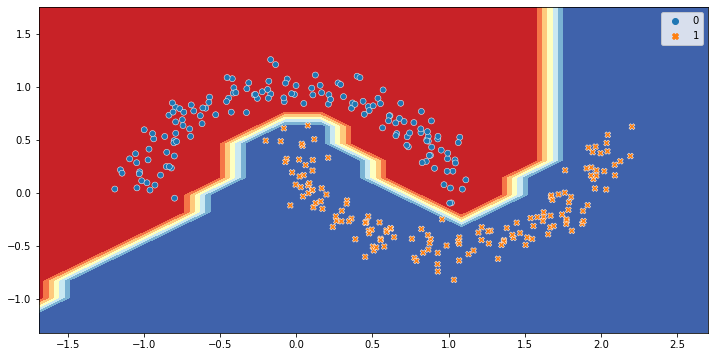

<Figure size 432x288 with 0 Axes>

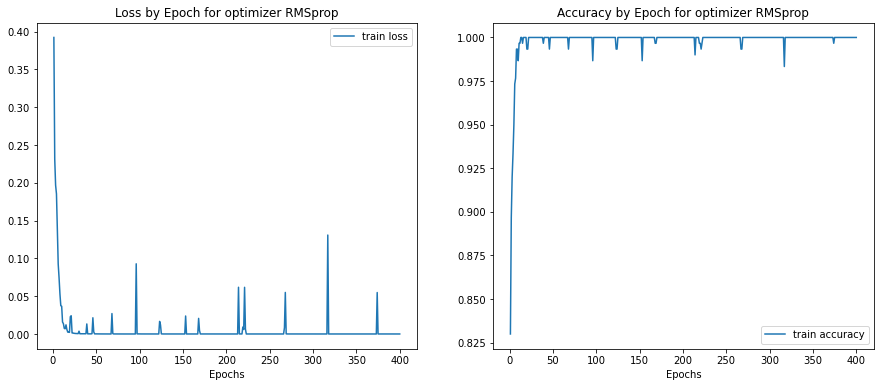

In [29]:
train_and_visualize_model(optimizer=RMSprop(learning_rate=0.01, rho=0.95), batch_size=32, epochs=400)

In [30]:
# mini-batch GD with adaptive GD -- Adam, keep both a list of all gradients and squared gradients 
from tensorflow.keras.optimizers import Adam

?Adam

Epoch 1/400
10/10 [==============================] - 0s 889us/step - loss: 0.6753 - accuracy: 0.4300
Epoch 2/400
10/10 [==============================] - 0s 778us/step - loss: 0.5248 - accuracy: 0.7600
Epoch 3/400
10/10 [==============================] - 0s 778us/step - loss: 0.3879 - accuracy: 0.8467
Epoch 4/400
10/10 [==============================] - 0s 889us/step - loss: 0.2740 - accuracy: 0.8767
Epoch 5/400
10/10 [==============================] - 0s 778us/step - loss: 0.2216 - accuracy: 0.9133
Epoch 6/400
10/10 [==============================] - 0s 1000us/step - loss: 0.1976 - accuracy: 0.9133
Epoch 7/400
10/10 [==============================] - 0s 778us/step - loss: 0.1729 - accuracy: 0.9167
Epoch 8/400
10/10 [==============================] - 0s 889us/step - loss: 0.1690 - accuracy: 0.9433
Epoch 9/400
10/10 [==============================] - 0s 889us/step - loss: 0.1495 - accuracy: 0.9233
Epoch 10/400
10/10 [==============================] - 0s 778us/step - loss: 0.1262 - accur

10/10 [==============================] - 0s 908us/step - loss: 2.7997e-05 - accuracy: 1.0000
Epoch 157/400
10/10 [==============================] - 0s 869us/step - loss: 2.8745e-05 - accuracy: 1.0000
Epoch 158/400
10/10 [==============================] - 0s 778us/step - loss: 2.7676e-05 - accuracy: 1.0000
Epoch 159/400
10/10 [==============================] - 0s 889us/step - loss: 2.6683e-05 - accuracy: 1.0000
Epoch 160/400
10/10 [==============================] - 0s 778us/step - loss: 2.6530e-05 - accuracy: 1.0000
Epoch 161/400
10/10 [==============================] - 0s 778us/step - loss: 2.5892e-05 - accuracy: 1.0000
Epoch 162/400
10/10 [==============================] - 0s 889us/step - loss: 2.5695e-05 - accuracy: 1.0000
Epoch 163/400
10/10 [==============================] - 0s 889us/step - loss: 2.5798e-05 - accuracy: 1.0000
Epoch 164/400
10/10 [==============================] - 0s 778us/step - loss: 2.5136e-05 - accuracy: 1.0000
Epoch 165/400
10/10 [==============================

10/10 [==============================] - 0s 889us/step - loss: 8.3075e-06 - accuracy: 1.0000
Epoch 309/400
10/10 [==============================] - 0s 1ms/step - loss: 8.3552e-06 - accuracy: 1.0000
Epoch 310/400
10/10 [==============================] - 0s 1000us/step - loss: 8.3643e-06 - accuracy: 1.0000
Epoch 311/400
10/10 [==============================] - 0s 889us/step - loss: 8.2189e-06 - accuracy: 1.0000
Epoch 312/400
10/10 [==============================] - 0s 889us/step - loss: 8.1891e-06 - accuracy: 1.0000
Epoch 313/400
10/10 [==============================] - 0s 778us/step - loss: 8.0485e-06 - accuracy: 1.0000
Epoch 314/400
10/10 [==============================] - 0s 889us/step - loss: 8.1927e-06 - accuracy: 1.0000
Epoch 315/400
10/10 [==============================] - 0s 778us/step - loss: 7.9056e-06 - accuracy: 1.0000
Epoch 316/400
10/10 [==============================] - 0s 889us/step - loss: 7.8575e-06 - accuracy: 1.0000
Epoch 317/400
10/10 [==============================]

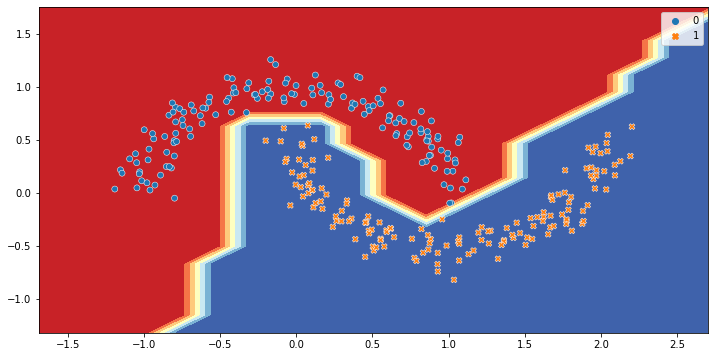

<Figure size 432x288 with 0 Axes>

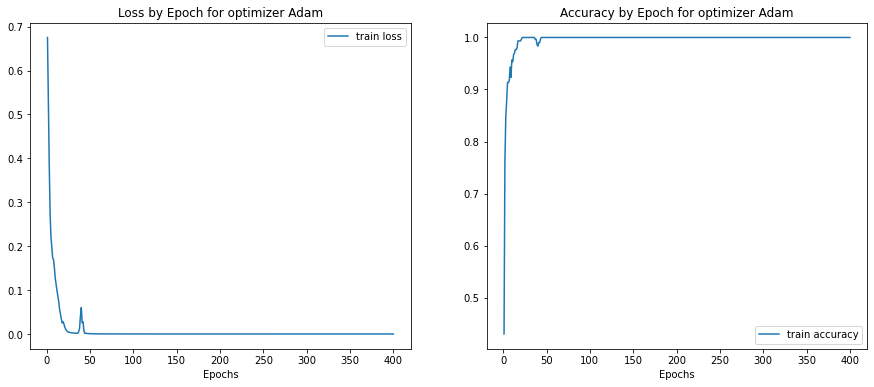

In [31]:
train_and_visualize_model(optimizer=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999), batch_size=32, epochs=400)

## Summary

In [33]:
learning_rate = 0.01
batch_size = 32
epochs = 500

optimizer = {
    "SGD": SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True),
    "Adagrad": Adagrad(learning_rate=learning_rate),
    "Adadelta": Adadelta(learning_rate=learning_rate, rho=1),
    "RMSprop": RMSprop(learning_rate=learning_rate, rho=0.95),
    "Adam": Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
}

all_histories = {}
for name in ["SGD", "Adagrad", "Adadelta", "RMSprop", "Adam"]:
    model = get_model(optimizer[name])
    history = model.fit(X,y, epochs=epochs, batch_size=batch_size, verbose=0)
    all_histories[name] = history.history["loss"]
    

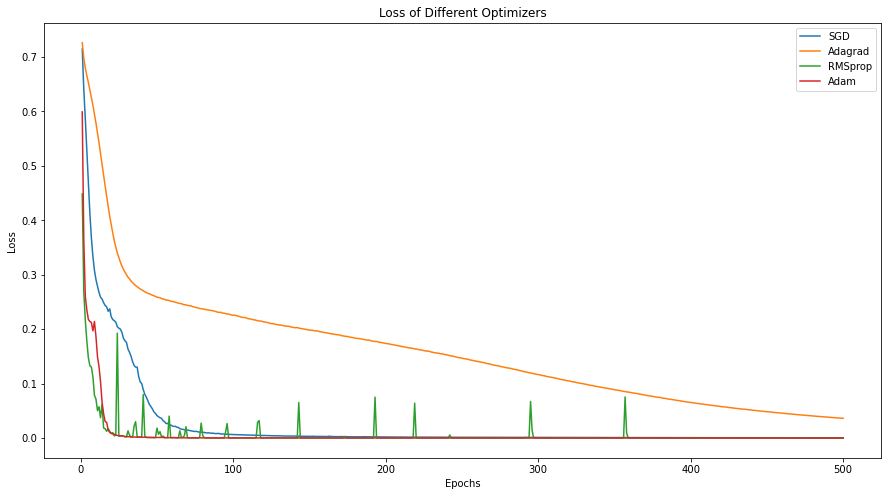

In [34]:
plt.figure(figsize=(15,8))

for optimizer, loss in all_histories.items():
    if optimizer == "Adadelta":
        continue
        
    plt.plot(range(1, epochs+1), loss, label=optimizer)
    
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss of Different Optimizers")
plt.legend()